In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
batch_size=20

In [2]:
sess = tf.Session()

In [3]:
x_vals = np.random.normal(1,0.1,100)

In [4]:
y_vals = np.repeat(10.,100)

In [88]:
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [89]:
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [90]:
A = tf.Variable(tf.random_normal(shape=[1]))

In [91]:
my_output = tf.multiply(x_data,A)

In [92]:
loss = tf.reduce_mean(tf.square(my_output - y_target))

In [93]:
init = tf.global_variables_initializer()

In [94]:
sess.run(init)

In [95]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)

In [96]:
train_step = my_opt.minimize(loss)

In [97]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100,size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    if (i+1)%5 ==0:
        print('Step #' + str(i+1) +' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
        print('Loss = '+str(temp_loss))
        loss_batch.append(temp_loss)


Step #5 A = [ 2.58887482]
Loss = 55.0519
Step #10 A = [ 3.94614053]
Loss = 37.2231
Step #15 A = [ 5.05128384]
Loss = 24.2064
Step #20 A = [ 5.95611382]
Loss = 18.4105
Step #25 A = [ 6.69500065]
Loss = 11.3645
Step #30 A = [ 7.30997801]
Loss = 8.66192
Step #35 A = [ 7.82001114]
Loss = 6.60431
Step #40 A = [ 8.21563911]
Loss = 3.55856
Step #45 A = [ 8.5239315]
Loss = 3.61986
Step #50 A = [ 8.79935074]
Loss = 1.6378
Step #55 A = [ 9.02114964]
Loss = 2.27357
Step #60 A = [ 9.19592285]
Loss = 1.86526
Step #65 A = [ 9.34150982]
Loss = 1.55317
Step #70 A = [ 9.4767046]
Loss = 1.38062
Step #75 A = [ 9.55903912]
Loss = 0.819804
Step #80 A = [ 9.62704468]
Loss = 0.789073
Step #85 A = [ 9.6651907]
Loss = 1.17517
Step #90 A = [ 9.71663189]
Loss = 1.70642
Step #95 A = [ 9.73319626]
Loss = 0.96832
Step #100 A = [ 9.80261993]
Loss = 1.28132


## Before running this model needs to be changed since stochastic methods allow us to use only one data point to do the iterations

In [84]:

loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    if (i+1)%5 ==0:
        print('Step #'+str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
        print('Loss = '+str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [ 2.26404285]
Loss = 65.178
Step #10 A = [ 3.68772364]
Loss = 35.0403
Step #15 A = [ 4.86371422]
Loss = 25.7754
Step #20 A = [ 5.81279373]
Loss = 22.1445
Step #25 A = [ 6.57850075]
Loss = 18.8944
Step #30 A = [ 7.24005985]
Loss = 7.32926
Step #35 A = [ 7.79697227]
Loss = 11.8795
Step #40 A = [ 8.18850136]
Loss = 3.24439
Step #45 A = [ 8.54618168]
Loss = 7.23768
Step #50 A = [ 8.86546803]
Loss = 2.03824
Step #55 A = [ 9.06622505]
Loss = 0.149784
Step #60 A = [ 9.23736668]
Loss = 0.0236952
Step #65 A = [ 9.26783466]
Loss = 1.06889
Step #70 A = [ 9.28282928]
Loss = 0.160574
Step #75 A = [ 9.38553047]
Loss = 5.79625
Step #80 A = [ 9.48271656]
Loss = 0.280529
Step #85 A = [ 9.49502659]
Loss = 0.0053633
Step #90 A = [ 9.72359657]
Loss = 2.53667
Step #95 A = [ 9.81340408]
Loss = 0.840597
Step #100 A = [ 9.93580055]
Loss = 0.24583


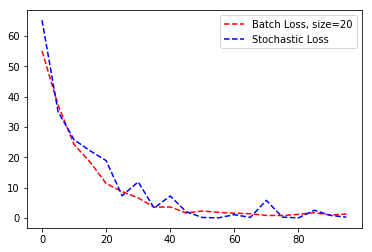

In [98]:
plt.plot(range(0,100,5),loss_batch,'r--',label='Batch Loss, size=20')
plt.plot(range(0,100,5),loss_stochastic,'b--',label='Stochastic Loss')
plt.legend(loc='upper right')
plt.show()
%matplotlib inline

### Conclusion
- Based on the graph above, stochastic needs more iterations to converge, while may move out of local minimums
- Batch might find minumums quicker, but takes more resources to compute